# Convert OpenGWAS Project vcf file to PLINK GWAS formats  

Type 2 Diabetes 2018 ebi-a-GCST007517 GWAS data downloaded from OpenGWAS Project:  

https://gwas.mrcieu.ac.uk/datasets/ebi-a-GCST007517/


<div>
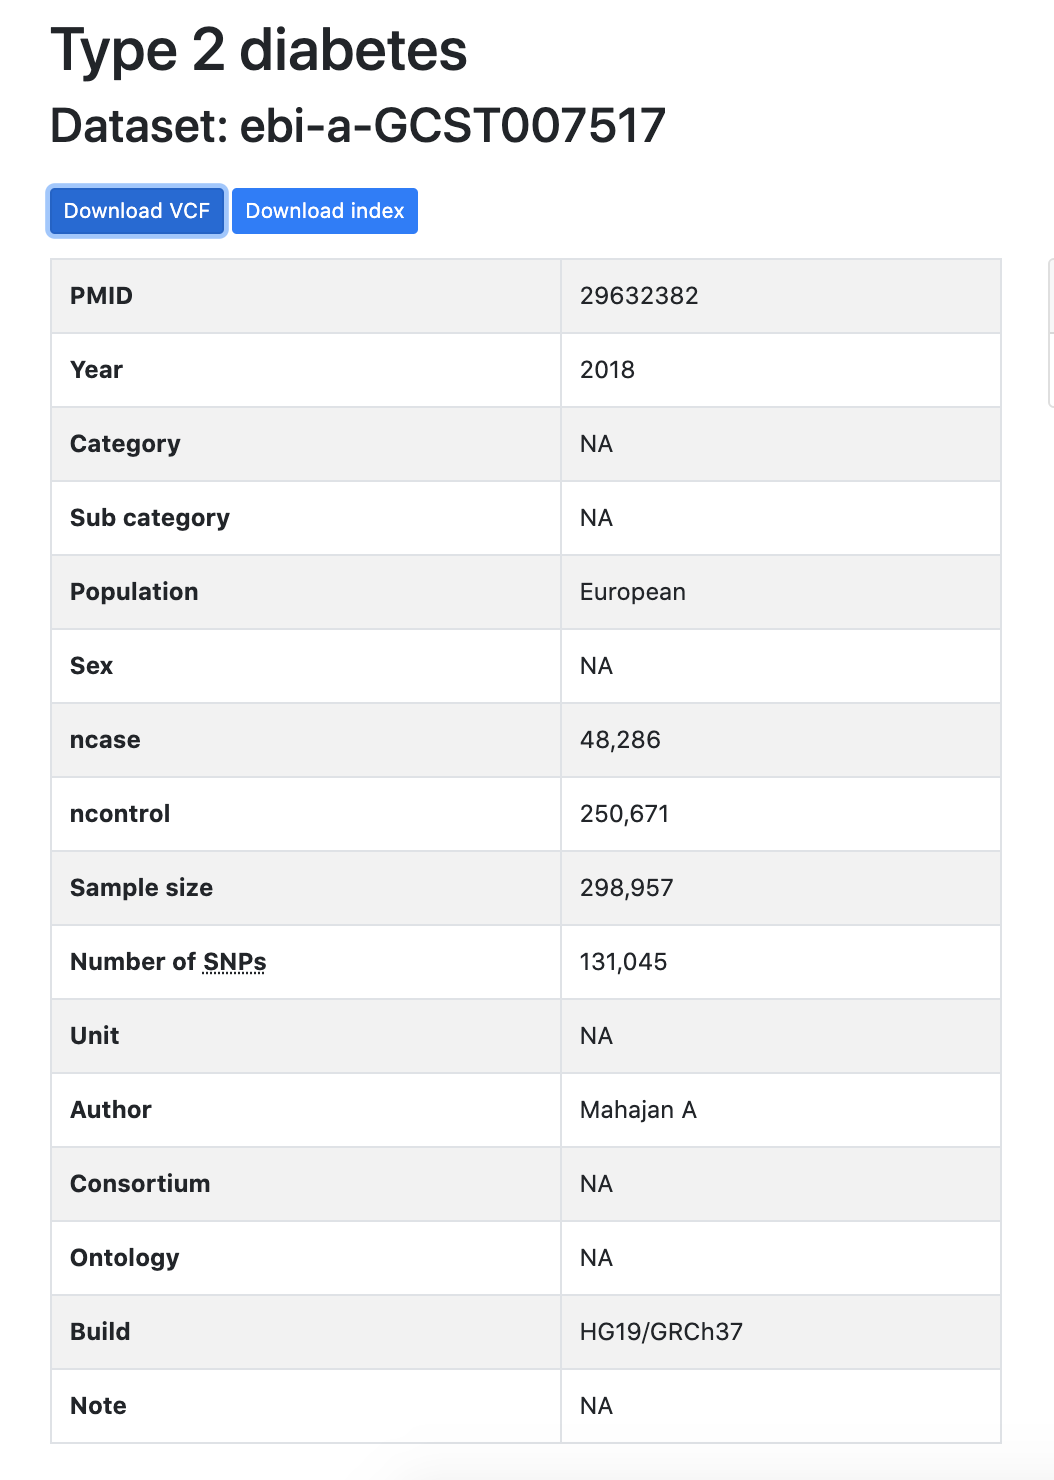
</div>  


#### Imports & Setup

In [1]:
import pandas as pd
import io

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### File I/O variables

In [2]:
## input file
vcf_file = '../data/gwas_vcf/ebi-a-GCST007517.vcf'


## output files
assoc_out = '../data/gwas_plink/T2D_ebi-a-GCST007517.assoc'
logistic_out = '../data/gwas_plink/T2D_ebi-a-GCST007517.assoc.logistic'
vcf_out = '../data/gwas_plink/T2D_ebi-a-GCST007517.vcf.extracted.gwas'

### Read in VCF file  

In [3]:
!grep "##FORMAT="  {vcf_file}

##FORMAT=<ID=ES,Number=A,Type=Float,Description="Effect size estimate relative to the alternative allele">
##FORMAT=<ID=SE,Number=A,Type=Float,Description="Standard error of effect size estimate">
##FORMAT=<ID=LP,Number=A,Type=Float,Description="-log10 p-value for effect estimate">
##FORMAT=<ID=AF,Number=A,Type=Float,Description="Alternate allele frequency in the association study">
##FORMAT=<ID=SS,Number=A,Type=Integer,Description="Sample size used to estimate genetic effect">
##FORMAT=<ID=EZ,Number=A,Type=Float,Description="Z-score provided if it was used to derive the EFFECT and SE fields">
##FORMAT=<ID=SI,Number=A,Type=Float,Description="Accuracy score of summary data imputation">
##FORMAT=<ID=NC,Number=A,Type=Integer,Description="Number of cases used to estimate genetic effect">
##FORMAT=<ID=ID,Number=1,Type=String,Description="Study variant identifier">


In [4]:
!awk 'NR >= 110 && NR <= 115'  {vcf_file}

#CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO	FORMAT	ebi-a-GCST007517
1	762320	rs75333668	C	T	.	PASS	AF=0.0011	ES:SE:LP:AF:ID	-0.0495:0.1728:0.0122891:0.0011:rs75333668
1	861349	rs200686669	C	T	.	PASS	AF=0.0034	ES:SE:LP:AF:ID	-0.0299:0.1837:0.115885:0.0034:rs200686669
1	865545	rs201186828	G	A	.	PASS	AF=0.0012	ES:SE:LP:AF:ID	0.1469:0.3851:0.153045:0.0012:rs201186828
1	865628	rs41285790	G	A	.	PASS	AF=0.0048	ES:SE:LP:AF:ID	0.0099:0.053:0.0877779:0.0048:rs41285790
1	865662	rs140751899	G	A	.	PASS	AF=0.0083	ES:SE:LP:AF:ID	-0.0434:0.1606:0.233959:0.0083:rs140751899


#### read vcf file using Python functions

In [5]:
def read_vcf(path):
    with open(path, 'r') as f:
        lines = [l for l in f if not l.startswith('##')]
    return pd.read_csv(
        io.StringIO(''.join(lines)),
        dtype={'#CHROM': str, 'POS': int, 'ID': str, 'REF': str, 'ALT': str,
               'QUAL': str, 'FILTER': str, 'INFO': str},
        sep='\t'
    ).rename(columns={'#CHROM': 'CHROM'})


def read_header(path):
    with open(path, 'r') as f:
        header = [l for l in f if l.startswith('##')]
    return header

In [6]:
vcf_in = read_vcf(vcf_file)

vcf_in.shape
vcf_in.head()

(131007, 10)

CHROM     POS           ID REF ALT QUAL FILTER       INFO          FORMAT  \
0     1  762320   rs75333668   C   T    .   PASS  AF=0.0011  ES:SE:LP:AF:ID   
1     1  861349  rs200686669   C   T    .   PASS  AF=0.0034  ES:SE:LP:AF:ID   
2     1  865545  rs201186828   G   A    .   PASS  AF=0.0012  ES:SE:LP:AF:ID   
3     1  865628   rs41285790   G   A    .   PASS  AF=0.0048  ES:SE:LP:AF:ID   
4     1  865662  rs140751899   G   A    .   PASS  AF=0.0083  ES:SE:LP:AF:ID   

                             ebi-a-GCST007517  
0  -0.0495:0.1728:0.0122891:0.0011:rs75333668  
1  -0.0299:0.1837:0.115885:0.0034:rs200686669  
2   0.1469:0.3851:0.153045:0.0012:rs201186828  
3    0.0099:0.053:0.0877779:0.0048:rs41285790  
4  -0.0434:0.1606:0.233959:0.0083:rs140751899

In [7]:
vcf_in['CHROM'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22'],
      dtype=object)

In [8]:
cols_input = vcf_in.columns.to_list()
cols_input

['CHROM',
 'POS',
 'ID',
 'REF',
 'ALT',
 'QUAL',
 'FILTER',
 'INFO',
 'FORMAT',
 'ebi-a-GCST007517']

In [9]:
cols_input[-1]

'ebi-a-GCST007517'

In [10]:
vcf_in[vcf_in['INFO']=='.']

CHROM       POS           ID REF ALT QUAL FILTER INFO       FORMAT  \
105        1   1022534  rs183314105   C   T    .   PASS    .  ES:SE:LP:ID   
187        1   1246022  rs145899282   G   A    .   PASS    .  ES:SE:LP:ID   
209        1   1267291   rs76584377   G   C    .   PASS    .  ES:SE:LP:ID   
329        1   1902133  rs200829667   G   C    .   PASS    .  ES:SE:LP:ID   
559        1   5924495  rs115869141   C   T    .   PASS    .  ES:SE:LP:ID   
...      ...       ...          ...  ..  ..  ...    ...  ...          ...   
129838    22  38130446  rs182816010   G   A    .   PASS    .  ES:SE:LP:ID   
130127    22  41077832  rs190547628   G   A    .   PASS    .  ES:SE:LP:ID   
130460    22  45258242  rs138849948   G   C    .   PASS    .  ES:SE:LP:ID   
130642    22  46794497  rs145851305   G   A    .   PASS    .  ES:SE:LP:ID   
130865    22  50728355   rs75911819   G   A    .   PASS    .  ES:SE:LP:ID   

                           ebi-a-GCST007517  
105     -0.7717:2.5831:0.395126:rs183314105  
187     -1.2063:3.5871:0.150826:rs145899282  
209        2.5208:1.1551:1.10441:rs76584377  
329     -0.8545:3.0866:0.113115:rs200829667  
559     -3.4764:6.4361:0.456801:rs115869141  
...                                     ...  
129838   1.0134:1.8385:0.200522:rs182816010  
130127   1.6438:1.1782:0.601192:rs190547628  
130460  -0.3176:2.4369:0.048274:rs138849948  
130642   -3.2288:5.524:0.334044:rs145851305  
130865     1.9171:1.3185:1.05247:rs75911819  

[643 rows x 10 columns]

In [11]:
vcf_in.dtypes

CHROM               object
POS                  int64
ID                  object
REF                 object
ALT                 object
QUAL                object
FILTER              object
INFO                object
FORMAT              object
ebi-a-GCST007517    object
dtype: object

#### Cast CHROM column to int

In [12]:
vcf_in['CHROM'] = vcf_in['CHROM'].astype(int)

vcf_in.dtypes

CHROM                int64
POS                  int64
ID                  object
REF                 object
ALT                 object
QUAL                object
FILTER              object
INFO                object
FORMAT              object
ebi-a-GCST007517    object
dtype: object

### Extract vcf format fields --> separate columns

Extract format field names from 'FORMAT' column

In [13]:
# _fmt_str = vcf_in.loc[0, 'FORMAT']
# _fmt_str

# _fmt_list = _fmt_str.split(':')
# _fmt_list

In [14]:
_format_vals = vcf_in['FORMAT'].unique().tolist()

_format_vals

['ES:SE:LP:AF:ID', 'ES:SE:LP:ID']

#### add cols before splitting FORMAT column

In [15]:
vcf_in['idx'] = vcf_in.index.copy()
# vcf_in['CHR'] = vcf_in['CHROM'].copy()
# vcf_in['BP'] = vcf_in['POS'].copy()
# vcf_in['A1'] = vcf_in['ALT'].copy()
# vcf_in['A2'] = vcf_in['REF'].copy()

vcf_in.dtypes

CHROM                int64
POS                  int64
ID                  object
REF                 object
ALT                 object
QUAL                object
FILTER              object
INFO                object
FORMAT              object
ebi-a-GCST007517    object
idx                  int64
dtype: object

#### rename ID column befoer splitting FORMAT column

In [16]:
vcf_in = vcf_in.rename(columns={'ID':'rsID'})

vcf_in.head(3)
vcf_in.columns

CHROM     POS         rsID REF ALT QUAL FILTER       INFO          FORMAT  \
0      1  762320   rs75333668   C   T    .   PASS  AF=0.0011  ES:SE:LP:AF:ID   
1      1  861349  rs200686669   C   T    .   PASS  AF=0.0034  ES:SE:LP:AF:ID   
2      1  865545  rs201186828   G   A    .   PASS  AF=0.0012  ES:SE:LP:AF:ID   

                             ebi-a-GCST007517  idx  
0  -0.0495:0.1728:0.0122891:0.0011:rs75333668    0  
1  -0.0299:0.1837:0.115885:0.0034:rs200686669    1  
2   0.1469:0.3851:0.153045:0.0012:rs201186828    2

Index(['CHROM', 'POS', 'rsID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO',
       'FORMAT', 'ebi-a-GCST007517', 'idx'],
      dtype='object')

#### Split DF by FORMAT colum

In [17]:
_vcf_in_a = vcf_in[vcf_in['FORMAT']== _format_vals[0]].copy()

_vcf_in_b = vcf_in[vcf_in['FORMAT']== _format_vals[1]].copy()

vcf_in.shape
_vcf_in_a.shape
_vcf_in_b.shape

(131007, 11)

(130364, 11)

(643, 11)

### Split sample column --> format fields

In [18]:
# vcf_in[_fmt_list] = vcf_in[cols_input[-1]].str.split(':', expand=True)

# vcf_in.head()

In [19]:
_vcf_in_a[_format_vals[0].split(':')] = _vcf_in_a[cols_input[-1]].str.split(':', expand=True)

vcf_in.shape
_vcf_in_a.shape
_vcf_in_a.head()

(131007, 11)

(130364, 16)

CHROM     POS         rsID REF ALT QUAL FILTER       INFO          FORMAT  \
0      1  762320   rs75333668   C   T    .   PASS  AF=0.0011  ES:SE:LP:AF:ID   
1      1  861349  rs200686669   C   T    .   PASS  AF=0.0034  ES:SE:LP:AF:ID   
2      1  865545  rs201186828   G   A    .   PASS  AF=0.0012  ES:SE:LP:AF:ID   
3      1  865628   rs41285790   G   A    .   PASS  AF=0.0048  ES:SE:LP:AF:ID   
4      1  865662  rs140751899   G   A    .   PASS  AF=0.0083  ES:SE:LP:AF:ID   

                             ebi-a-GCST007517  idx       ES      SE  \
0  -0.0495:0.1728:0.0122891:0.0011:rs75333668    0  -0.0495  0.1728   
1  -0.0299:0.1837:0.115885:0.0034:rs200686669    1  -0.0299  0.1837   
2   0.1469:0.3851:0.153045:0.0012:rs201186828    2   0.1469  0.3851   
3    0.0099:0.053:0.0877779:0.0048:rs41285790    3   0.0099   0.053   
4  -0.0434:0.1606:0.233959:0.0083:rs140751899    4  -0.0434  0.1606   

          LP      AF           ID  
0  0.0122891  0.0011   rs75333668  
1   0.115885  0.0034  rs200686669  
2   0.153045  0.0012  rs201186828  
3  0.0877779  0.0048   rs41285790  
4   0.233959  0.0083  rs140751899

In [20]:
_vcf_in_b[_format_vals[1].split(':')] = _vcf_in_b[cols_input[-1]].str.split(':', expand=True)

vcf_in.shape
_vcf_in_b.shape

vcf_in.head(2)
_vcf_in_b.head()

vcf_in.columns
_vcf_in_b.columns

(131007, 11)

(643, 15)

CHROM     POS         rsID REF ALT QUAL FILTER       INFO          FORMAT  \
0      1  762320   rs75333668   C   T    .   PASS  AF=0.0011  ES:SE:LP:AF:ID   
1      1  861349  rs200686669   C   T    .   PASS  AF=0.0034  ES:SE:LP:AF:ID   

                             ebi-a-GCST007517  idx  
0  -0.0495:0.1728:0.0122891:0.0011:rs75333668    0  
1  -0.0299:0.1837:0.115885:0.0034:rs200686669    1

CHROM      POS         rsID REF ALT QUAL FILTER INFO       FORMAT  \
105      1  1022534  rs183314105   C   T    .   PASS    .  ES:SE:LP:ID   
187      1  1246022  rs145899282   G   A    .   PASS    .  ES:SE:LP:ID   
209      1  1267291   rs76584377   G   C    .   PASS    .  ES:SE:LP:ID   
329      1  1902133  rs200829667   G   C    .   PASS    .  ES:SE:LP:ID   
559      1  5924495  rs115869141   C   T    .   PASS    .  ES:SE:LP:ID   

                        ebi-a-GCST007517  idx       ES      SE        LP  \
105  -0.7717:2.5831:0.395126:rs183314105  105  -0.7717  2.5831  0.395126   
187  -1.2063:3.5871:0.150826:rs145899282  187  -1.2063  3.5871  0.150826   
209     2.5208:1.1551:1.10441:rs76584377  209   2.5208  1.1551   1.10441   
329  -0.8545:3.0866:0.113115:rs200829667  329  -0.8545  3.0866  0.113115   
559  -3.4764:6.4361:0.456801:rs115869141  559  -3.4764  6.4361  0.456801   

              ID  
105  rs183314105  
187  rs145899282  
209   rs76584377  
329  rs200829667  
559  rs115869141

Index(['CHROM', 'POS', 'rsID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO',
       'FORMAT', 'ebi-a-GCST007517', 'idx'],
      dtype='object')

Index(['CHROM', 'POS', 'rsID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO',
       'FORMAT', 'ebi-a-GCST007517', 'idx', 'ES', 'SE', 'LP', 'ID'],
      dtype='object')

In [21]:
vcf_in2 = pd.concat([_vcf_in_a, _vcf_in_b], axis=0)


vcf_in.shape
vcf_in2.shape

vcf_in2.tail(3)

vcf_in2['AF'] = vcf_in2['AF'].fillna(0.0)

vcf_in2.tail(3)

vcf_in2 = vcf_in2.sort_values('idx').reset_index(drop=True).drop(columns=['idx'])

vcf_in2.tail(3)

## delete orig DF
del vcf_in

(131007, 11)

(131007, 16)

CHROM       POS         rsID REF ALT QUAL FILTER INFO       FORMAT  \
130460     22  45258242  rs138849948   G   C    .   PASS    .  ES:SE:LP:ID   
130642     22  46794497  rs145851305   G   A    .   PASS    .  ES:SE:LP:ID   
130865     22  50728355   rs75911819   G   A    .   PASS    .  ES:SE:LP:ID   

                           ebi-a-GCST007517     idx       ES      SE  \
130460  -0.3176:2.4369:0.048274:rs138849948  130460  -0.3176  2.4369   
130642   -3.2288:5.524:0.334044:rs145851305  130642  -3.2288   5.524   
130865     1.9171:1.3185:1.05247:rs75911819  130865   1.9171  1.3185   

              LP   AF           ID  
130460  0.048274  NaN  rs138849948  
130642  0.334044  NaN  rs145851305  
130865   1.05247  NaN   rs75911819

CHROM       POS         rsID REF ALT QUAL FILTER INFO       FORMAT  \
130460     22  45258242  rs138849948   G   C    .   PASS    .  ES:SE:LP:ID   
130642     22  46794497  rs145851305   G   A    .   PASS    .  ES:SE:LP:ID   
130865     22  50728355   rs75911819   G   A    .   PASS    .  ES:SE:LP:ID   

                           ebi-a-GCST007517     idx       ES      SE  \
130460  -0.3176:2.4369:0.048274:rs138849948  130460  -0.3176  2.4369   
130642   -3.2288:5.524:0.334044:rs145851305  130642  -3.2288   5.524   
130865     1.9171:1.3185:1.05247:rs75911819  130865   1.9171  1.3185   

              LP   AF           ID  
130460  0.048274  0.0  rs138849948  
130642  0.334044  0.0  rs145851305  
130865   1.05247  0.0   rs75911819

CHROM       POS         rsID REF ALT QUAL FILTER       INFO  \
131004     22  51160154  rs201483867   G   A    .   PASS  AF=0.0016   
131005     22  51176664  rs145373249   A   G    .   PASS  AF=0.0005   
131006     22  51181759   rs13056621   A   G    .   PASS  AF=0.8603   

                FORMAT                           ebi-a-GCST007517       ES  \
131004  ES:SE:LP:AF:ID  0.1392:0.1121:0.514279:0.0016:rs201483867   0.1392   
131005  ES:SE:LP:AF:ID  0.5101:0.7805:0.262807:0.0005:rs145373249   0.5101   
131006  ES:SE:LP:AF:ID    -0.0203:0.011:1.01149:0.8603:rs13056621  -0.0203   

            SE        LP      AF           ID  
131004  0.1121  0.514279  0.0016  rs201483867  
131005  0.7805  0.262807  0.0005  rs145373249  
131006   0.011   1.01149  0.8603   rs13056621

In [22]:
vcf_in2 = vcf_in2.rename(columns={'ID':'SNP', 'rsID':'ID'})

vcf_in2.head(3)
vcf_in2.columns

CHROM     POS           ID REF ALT QUAL FILTER       INFO          FORMAT  \
0      1  762320   rs75333668   C   T    .   PASS  AF=0.0011  ES:SE:LP:AF:ID   
1      1  861349  rs200686669   C   T    .   PASS  AF=0.0034  ES:SE:LP:AF:ID   
2      1  865545  rs201186828   G   A    .   PASS  AF=0.0012  ES:SE:LP:AF:ID   

                             ebi-a-GCST007517       ES      SE         LP  \
0  -0.0495:0.1728:0.0122891:0.0011:rs75333668  -0.0495  0.1728  0.0122891   
1  -0.0299:0.1837:0.115885:0.0034:rs200686669  -0.0299  0.1837   0.115885   
2   0.1469:0.3851:0.153045:0.0012:rs201186828   0.1469  0.3851   0.153045   

       AF          SNP  
0  0.0011   rs75333668  
1  0.0034  rs200686669  
2  0.0012  rs201186828

Index(['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT',
       'ebi-a-GCST007517', 'ES', 'SE', 'LP', 'AF', 'SNP'],
      dtype='object')

#### cast extracted columns

In [23]:
cols_format = [c for c in vcf_in2.columns if c not in cols_input]

cols_format

['ES', 'SE', 'LP', 'AF', 'SNP']

In [24]:
vcf_in2.dtypes

CHROM                int64
POS                  int64
ID                  object
REF                 object
ALT                 object
QUAL                object
FILTER              object
INFO                object
FORMAT              object
ebi-a-GCST007517    object
ES                  object
SE                  object
LP                  object
AF                  object
SNP                 object
dtype: object

In [25]:
for c in cols_format:
    if c not in ['ID', 'SNP']:
        print(c)
        vcf_in2[c] = pd.to_numeric(vcf_in2[c])
#         vcf_in2[c] = vcf_in2[c].astype(float)

vcf_in2.dtypes

ES
SE
LP
AF


CHROM                 int64
POS                   int64
ID                   object
REF                  object
ALT                  object
QUAL                 object
FILTER               object
INFO                 object
FORMAT               object
ebi-a-GCST007517     object
ES                  float64
SE                  float64
LP                  float64
AF                  float64
SNP                  object
dtype: object

<br>  

<br>  

# Convert extracted vcf DF to PLINK format

https://www.cog-genomics.org/plink/1.9/formats#assoc



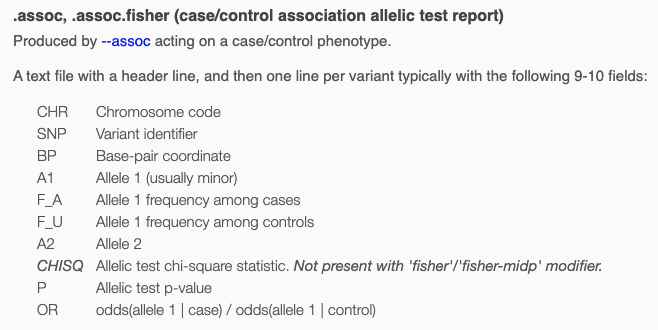  

https://www.cog-genomics.org/plink/1.9/formats#assoc_linear  


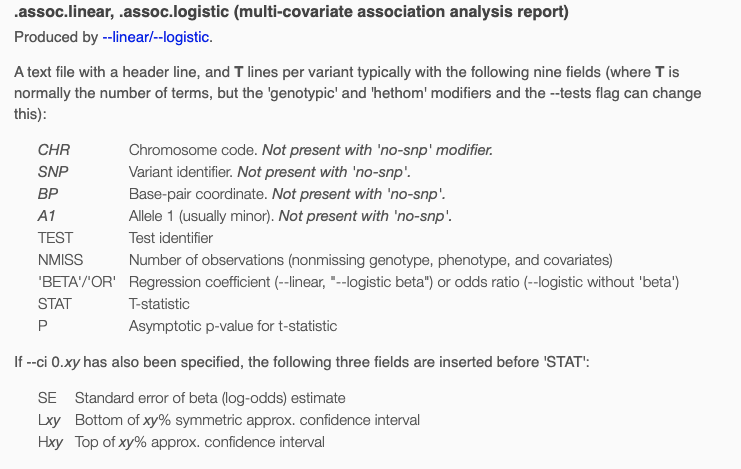  



**add renamed columns:**  
* A1 = Alt Allele (PLINK A1 allele is usually but not always Alt allele)  
* A2 = Ref Allele  
* BP = POS  
* OR = ES = effect size  
* NMISS = .logistic number of observations (nonmissing genotype, phenotype, & covar)

**add columns with "dummy" values:**  
* F_A = .assoc AF affected  
* F_U = .assoc AF unaffected  
* CHISQ = .assoc ChiSquare  
* TEST = .logistic statistical test (set to ADD for additive model)    
* STAT = .logistic t-statistic  


**convert vcf columns to plink columns:**  

* SNP from CHR + BP  
* P from LP (LP = -log10 P) --> 10^-LP  


In [26]:
cols_assoc = ['CHR', 'SNP', 'BP', 'A1', 'F_A', 'F_U', 'A2', 'CHISQ', 'P', 'OR']
cols_logistic = ['CHR', 'SNP', 'BP', 'A1', 'TEST', 'NMISS', 'OR', 'SE', 'STAT', 'P']

In [27]:
# df = vcf_in.copy() 

df = vcf_in2.copy() 

In [28]:
df.columns

Index(['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT',
       'ebi-a-GCST007517', 'ES', 'SE', 'LP', 'AF', 'SNP'],
      dtype='object')

#### 1) add renamed columns:  

* A1 = Alt Allele (PLINK A1 allele is usually but not always Alt allele)  
* A2 = Ref Allele  
* BP = POS  
* OR = ES = effect size  
* NMISS = SS = sample size (approx, not quite the number of observations) | 0 if SS not in .vcf file

In [29]:
df['CHR'] = df['CHROM'].copy()
df['BP'] = df['POS'].copy()
df['A1'] = df['ALT'].copy()
df['A2'] = df['REF'].copy()
df['OR'] = df['ES'].copy()

if 'SS' in df.columns:
    df['NMISS'] = df['SS'].copy()
else:
    df['NMISS'] = 0

df.head(3)
df.dtypes

CHROM     POS           ID REF ALT QUAL FILTER       INFO          FORMAT  \
0      1  762320   rs75333668   C   T    .   PASS  AF=0.0011  ES:SE:LP:AF:ID   
1      1  861349  rs200686669   C   T    .   PASS  AF=0.0034  ES:SE:LP:AF:ID   
2      1  865545  rs201186828   G   A    .   PASS  AF=0.0012  ES:SE:LP:AF:ID   

                             ebi-a-GCST007517  ...      SE        LP      AF  \
0  -0.0495:0.1728:0.0122891:0.0011:rs75333668  ...  0.1728  0.012289  0.0011   
1  -0.0299:0.1837:0.115885:0.0034:rs200686669  ...  0.1837  0.115885  0.0034   
2   0.1469:0.3851:0.153045:0.0012:rs201186828  ...  0.3851  0.153045  0.0012   

           SNP CHR      BP  A1 A2      OR  NMISS  
0   rs75333668   1  762320   T  C -0.0495      0  
1  rs200686669   1  861349   T  C -0.0299      0  
2  rs201186828   1  865545   A  G  0.1469      0  

[3 rows x 21 columns]

CHROM                 int64
POS                   int64
ID                   object
REF                  object
ALT                  object
QUAL                 object
FILTER               object
INFO                 object
FORMAT               object
ebi-a-GCST007517     object
ES                  float64
SE                  float64
LP                  float64
AF                  float64
SNP                  object
CHR                   int64
BP                    int64
A1                   object
A2                   object
OR                  float64
NMISS                 int64
dtype: object

In [30]:
df['CHROM'].unique()
df['CHR'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22])

#### 2) add columns with "dummy" values:  

* F_A = .assoc AF affected  
* F_U = .assoc AF unaffected  
* CHISQ = .assoc ChiSquare  
* TEST = .logistic statistical test (set to ADD for additive model)  
* STAT = .logistic t-statistic  


In [31]:
df['F_A'] = 0.0 
df['F_U'] = 0.0 
df['CHISQ'] = 0.0 
df['TEST'] = 'ADD' 
df['STAT'] = 0.0 

df.head(3)

CHROM     POS           ID REF ALT QUAL FILTER       INFO          FORMAT  \
0      1  762320   rs75333668   C   T    .   PASS  AF=0.0011  ES:SE:LP:AF:ID   
1      1  861349  rs200686669   C   T    .   PASS  AF=0.0034  ES:SE:LP:AF:ID   
2      1  865545  rs201186828   G   A    .   PASS  AF=0.0012  ES:SE:LP:AF:ID   

                             ebi-a-GCST007517  ...      BP  A1  A2      OR  \
0  -0.0495:0.1728:0.0122891:0.0011:rs75333668  ...  762320   T   C -0.0495   
1  -0.0299:0.1837:0.115885:0.0034:rs200686669  ...  861349   T   C -0.0299   
2   0.1469:0.3851:0.153045:0.0012:rs201186828  ...  865545   A   G  0.1469   

  NMISS  F_A  F_U CHISQ TEST  STAT  
0     0  0.0  0.0   0.0  ADD   0.0  
1     0  0.0  0.0   0.0  ADD   0.0  
2     0  0.0  0.0   0.0  ADD   0.0  

[3 rows x 26 columns]

#### 3) convert vcf columns to plink columns:    

* P from LP (LP = -log10 P) --> 10^-LP  

In [32]:
# df['SNP'] = df['CHROM'].astype(str) + '_' + df['POS'].astype(str) + '_' + df['ID'].astype(str) 

# df.head(3)

In [33]:
df['LP'] = df['LP'].astype(float)

df['P'] = pow(10, -df['LP'])

df.head(3)

CHROM     POS           ID REF ALT QUAL FILTER       INFO          FORMAT  \
0      1  762320   rs75333668   C   T    .   PASS  AF=0.0011  ES:SE:LP:AF:ID   
1      1  861349  rs200686669   C   T    .   PASS  AF=0.0034  ES:SE:LP:AF:ID   
2      1  865545  rs201186828   G   A    .   PASS  AF=0.0012  ES:SE:LP:AF:ID   

                             ebi-a-GCST007517  ...  A1  A2      OR  NMISS  \
0  -0.0495:0.1728:0.0122891:0.0011:rs75333668  ...   T   C -0.0495      0   
1  -0.0299:0.1837:0.115885:0.0034:rs200686669  ...   T   C -0.0299      0   
2   0.1469:0.3851:0.153045:0.0012:rs201186828  ...   A   G  0.1469      0   

   F_A  F_U  CHISQ TEST STAT         P  
0  0.0  0.0    0.0  ADD  0.0  0.972100  
1  0.0  0.0    0.0  ADD  0.0  0.765799  
2  0.0  0.0    0.0  ADD  0.0  0.702999  

[3 rows x 27 columns]

In [34]:
df[['LP', 'P']].head(10)

LP         P
0  0.012289  0.972100
1  0.115885  0.765799
2  0.153045  0.702999
3  0.087778  0.817000
4  0.233959  0.583500
5  1.063540  0.086389
6  0.009839  0.977600
7  0.378512  0.418300
8  0.241997  0.572800
9  0.087353  0.817800

In [35]:
df[df['P'].isnull()]


Empty DataFrame
Columns: [CHROM, POS, ID, REF, ALT, QUAL, FILTER, INFO, FORMAT, ebi-a-GCST007517, ES, SE, LP, AF, SNP, CHR, BP, A1, A2, OR, NMISS, F_A, F_U, CHISQ, TEST, STAT, P]
Index: []

[0 rows x 27 columns]

<br>  

## Extract columns for .assoc + .logistic output files

In [36]:
df_assoc = df[cols_assoc]
df_logistic = df[cols_logistic]

df_assoc.shape
df_logistic.shape
df.shape

(131007, 10)

(131007, 10)

(131007, 27)

In [37]:
df_assoc.head(2)
df_logistic.head(2)

CHR          SNP      BP A1  F_A  F_U A2  CHISQ         P      OR
0    1   rs75333668  762320  T  0.0  0.0  C    0.0  0.972100 -0.0495
1    1  rs200686669  861349  T  0.0  0.0  C    0.0  0.765799 -0.0299

CHR          SNP      BP A1 TEST  NMISS      OR      SE  STAT         P
0    1   rs75333668  762320  T  ADD      0 -0.0495  0.1728   0.0  0.972100
1    1  rs200686669  861349  T  ADD      0 -0.0299  0.1837   0.0  0.765799

### write output files

In [38]:
df_assoc.to_csv(assoc_out, header=True, index=False, sep=' ')
df_logistic.to_csv(logistic_out, header=True, index=False, sep=' ')

In [39]:
df.to_csv(vcf_out, header=True, index=False, sep='\t')